In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
zero = np.zeros((100,100))
number =1

In [3]:
# df = pd.read_csv('csv_results/result_16.csv')
# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv')
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv')
df = pd.read_csv(f'finetuned_csv_results/result_{number}.csv')

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').head(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').head(33)
# df = pd.read_csv('csv_results/result_18.csv').sort_values(by='seed').head(33)

# df_ar = pd.read_csv('csv_results_mercury/result_ar.csv').sort_values(by='seed').tail(33)
# df_arma = pd.read_csv('csv_results_mercury/result_arma.csv').sort_values(by='seed').tail(33)
# df = pd.read_csv('csv_results/result_1.csv').sort_values(by='seed').tail(33)
df

,seed,Test,True,ARMA,ARMA_Order,ARMA_Train_loss,ARMA_Valid_loss,AR,AR_Order,TimesFM_128
0,6,"[-0.35669807027399814, 0.1438603781162, 0.8698...","[0.4741405163540797, -0.593768328451038, 0.440...","[0.48990268237866236, -0.6085075916139235, 0.4...","(1, 0, 1)",0.335782,0.815823,"[0.5070777313755688, -0.6728244826609255, 0.42...","(3, 0, 0)","[0.3633804664863822, 0.14187266437527896, 0.09..."
1,4,"[0.738707960379525, 0.3575563661975284, 0.2155...","[0.11702006471055498, 0.6801979280242475, 0.01...","[0.13597602512310872, 0.6627423225452442, 0.04...","(1, 0, 1)",0.327459,0.951216,"[0.190953589741241, 0.6534962396103745, 0.0945...","(3, 0, 0)","[0.6172870340309565, 0.6621648365382001, 0.505..."
2,1,"[0.23722607578487998, -0.6118774781293821, -1....","[0.07559133743852942, 0.19943040706561527, -0....","[0.07777007984539812, 0.20559422319105836, -0....","(1, 0, 1)",0.331591,1.097849,"[-0.033519778737932146, 0.21346260653782628, -...","(3, 0, 0)","[0.5566571181006877, 0.5584891871374285, 0.143..."
3,3,"[-0.480500230327959, -0.10288974808592663, -0....","[-0.6332714291518686, -0.16386451575202474, -0...","[-0.6497091526880177, -0.1702091358373135, -0....","(1, 0, 1)",0.339292,0.805027,"[-0.6124977437081173, -0.2602658833245761, 0.0...","(3, 0, 0)","[-0.19896558778303225, -0.24009933550795165, -..."
4,5,"[0.3315127974901487, -0.028278250345896316, 0....","[-0.2550283840928068, 0.45902698953655213, -0....","[-0.27902409009189866, 0.4776691034822115, -0....","(1, 0, 1)",0.344323,0.764338,"[-0.2044663442091374, 0.4745963377701957, -0.2...","(4, 0, 0)","[0.20747453731832066, 0.27963923593799506, 0.1..."
...,...,...,...,...,...,...,...,...,...,...
95,96,"[0.11383218183422275, 0.41920871591746534, 1.3...","[-0.019069130321742706, 0.1233667469950941, 0....","[-0.016590453421030715, 0.13123366999491626, 0...","(1, 0, 1)",0.323200,0.917492,"[0.06937947098974956, 0.1333008192633889, 0.31...","(3, 0, 0)","[-0.08662200155204983, 0.23443695484309557, 0...."
96,98,"[0.12294335302766429, 0.6586295891477929, 0.83...","[-0.7710117823300484, 0.5084492441926884, 0.40...","[-0.7038392394964866, 0.6084102866145992, 0.44...","(3, 0, 0)",0.326682,0.728734,"[-0.7038392394964866, 0.6084102866145992, 0.44...","(3, 0, 0)","[-0.7902647627955302, -0.28693347430824484, 0...."
97,97,"[2.096768549452959, 0.8687236063515692, -0.713...","[1.159308995056429, 1.5171140519247444, 0.1101...","[1.2188654987889425, 1.497740518660685, -0.103...","(5, 0, 0)",0.343489,0.876312,"[1.2188654987889425, 1.497740518660685, -0.103...","(5, 0, 0)","[0.901140981747291, 1.0739641083575098, 0.9397..."
98,99,"[0.5556325726293228, 0.587605080100709, -0.013...","[0.23068489581927115, 0.4402901247196872, 0.36...","[0.22986461091547444, 0.44233390775480563, 0.3...","(1, 0, 1)",0.328811,0.909876,"[0.27946395398924756, 0.44595512921746794, 0.3...","(3, 0, 0)","[0.13684759888369963, 0.4743043472656648, 0.54..."


In [4]:
# ar_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# ar_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['AR'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
arma_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

In [5]:
# zero_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')
# zero_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),zero,multioutput='raw_values')

In [6]:
model_mse={}
model_mse_true={}
for col in df.columns[9:]:

    model_mse[col] = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df[col].apply(ast.literal_eval).to_list()),multioutput='raw_values')
    model_mse_true[col] = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df[col].apply(ast.literal_eval).to_list()),multioutput='raw_values')
model_mse_true

{'TimesFM_128': array([0.19136486, 0.22098204, 0.19425183, 0.18634152, 0.18673962,
        0.20517806, 0.20735161, 0.19592071, 0.21571226, 0.20284377,
        0.17437565, 0.19604149, 0.22704181, 0.1607295 , 0.22880759,
        0.20571292, 0.18040001, 0.17584287, 0.19255409, 0.18408847,
        0.19130561, 0.19899669, 0.17753263, 0.20850066, 0.19456733,
        0.2015368 , 0.18390272, 0.17239291, 0.20028303, 0.21214936,
        0.2046643 , 0.20818116, 0.18844916, 0.20607102, 0.22367183,
        0.24786159, 0.19328348, 0.21672657, 0.21255549, 0.18758604,
        0.19589445, 0.1429908 , 0.19467625, 0.1747392 , 0.23318985,
        0.21420952, 0.23017781, 0.22810188, 0.18588708, 0.15695479,
        0.23556648, 0.21189016, 0.20363284, 0.21952142, 0.20256038,
        0.19803016, 0.1911806 , 0.2305886 , 0.21004404, 0.24136456,
        0.16521536, 0.20307007, 0.21624253, 0.15955126, 0.17135672,
        0.20716936, 0.17456225, 0.20833354, 0.20726331, 0.19190826,
        0.22924864, 0.21439033, 0

In [7]:
# informer_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# informer_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

# rnn_mse = mean_squared_error(np.array(df['Test'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
# rnn_mse_true = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')

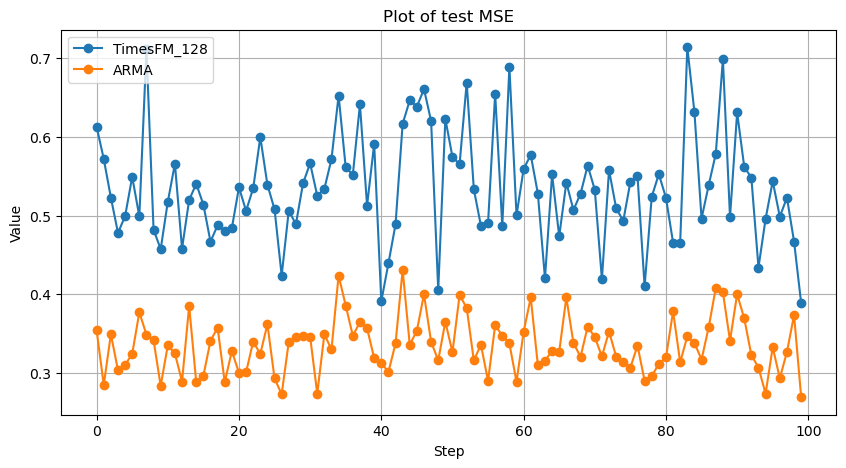

In [8]:
# Plotting the array
plt.figure(figsize=(10, 5))
for col in model_mse.keys():
    plt.plot(model_mse[col], label=col, marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
# plt.plot(ar_mse,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of test MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


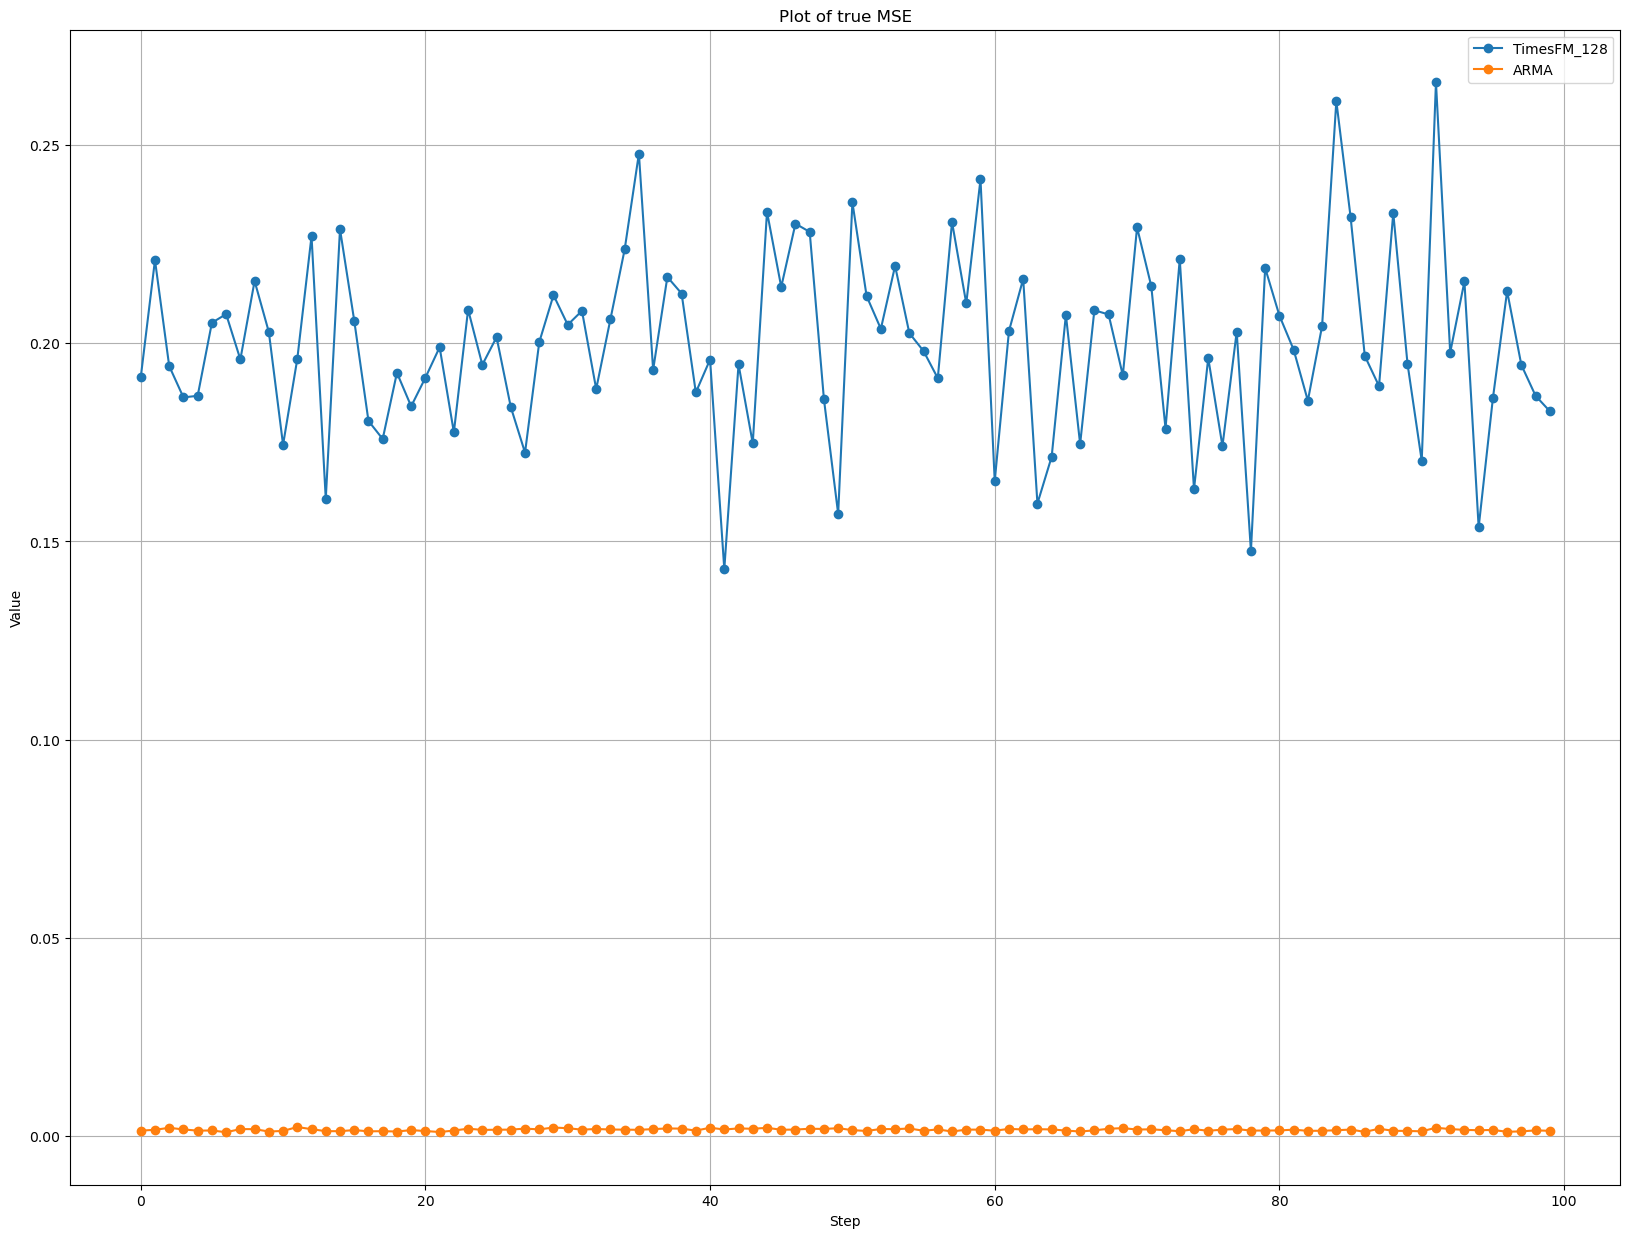

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(20, 15))
for col in model_mse_true.keys():
    plt.plot(model_mse_true[col], label=col, marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point

# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig(f'MSE_Plot/{number}.png')
plt.show()


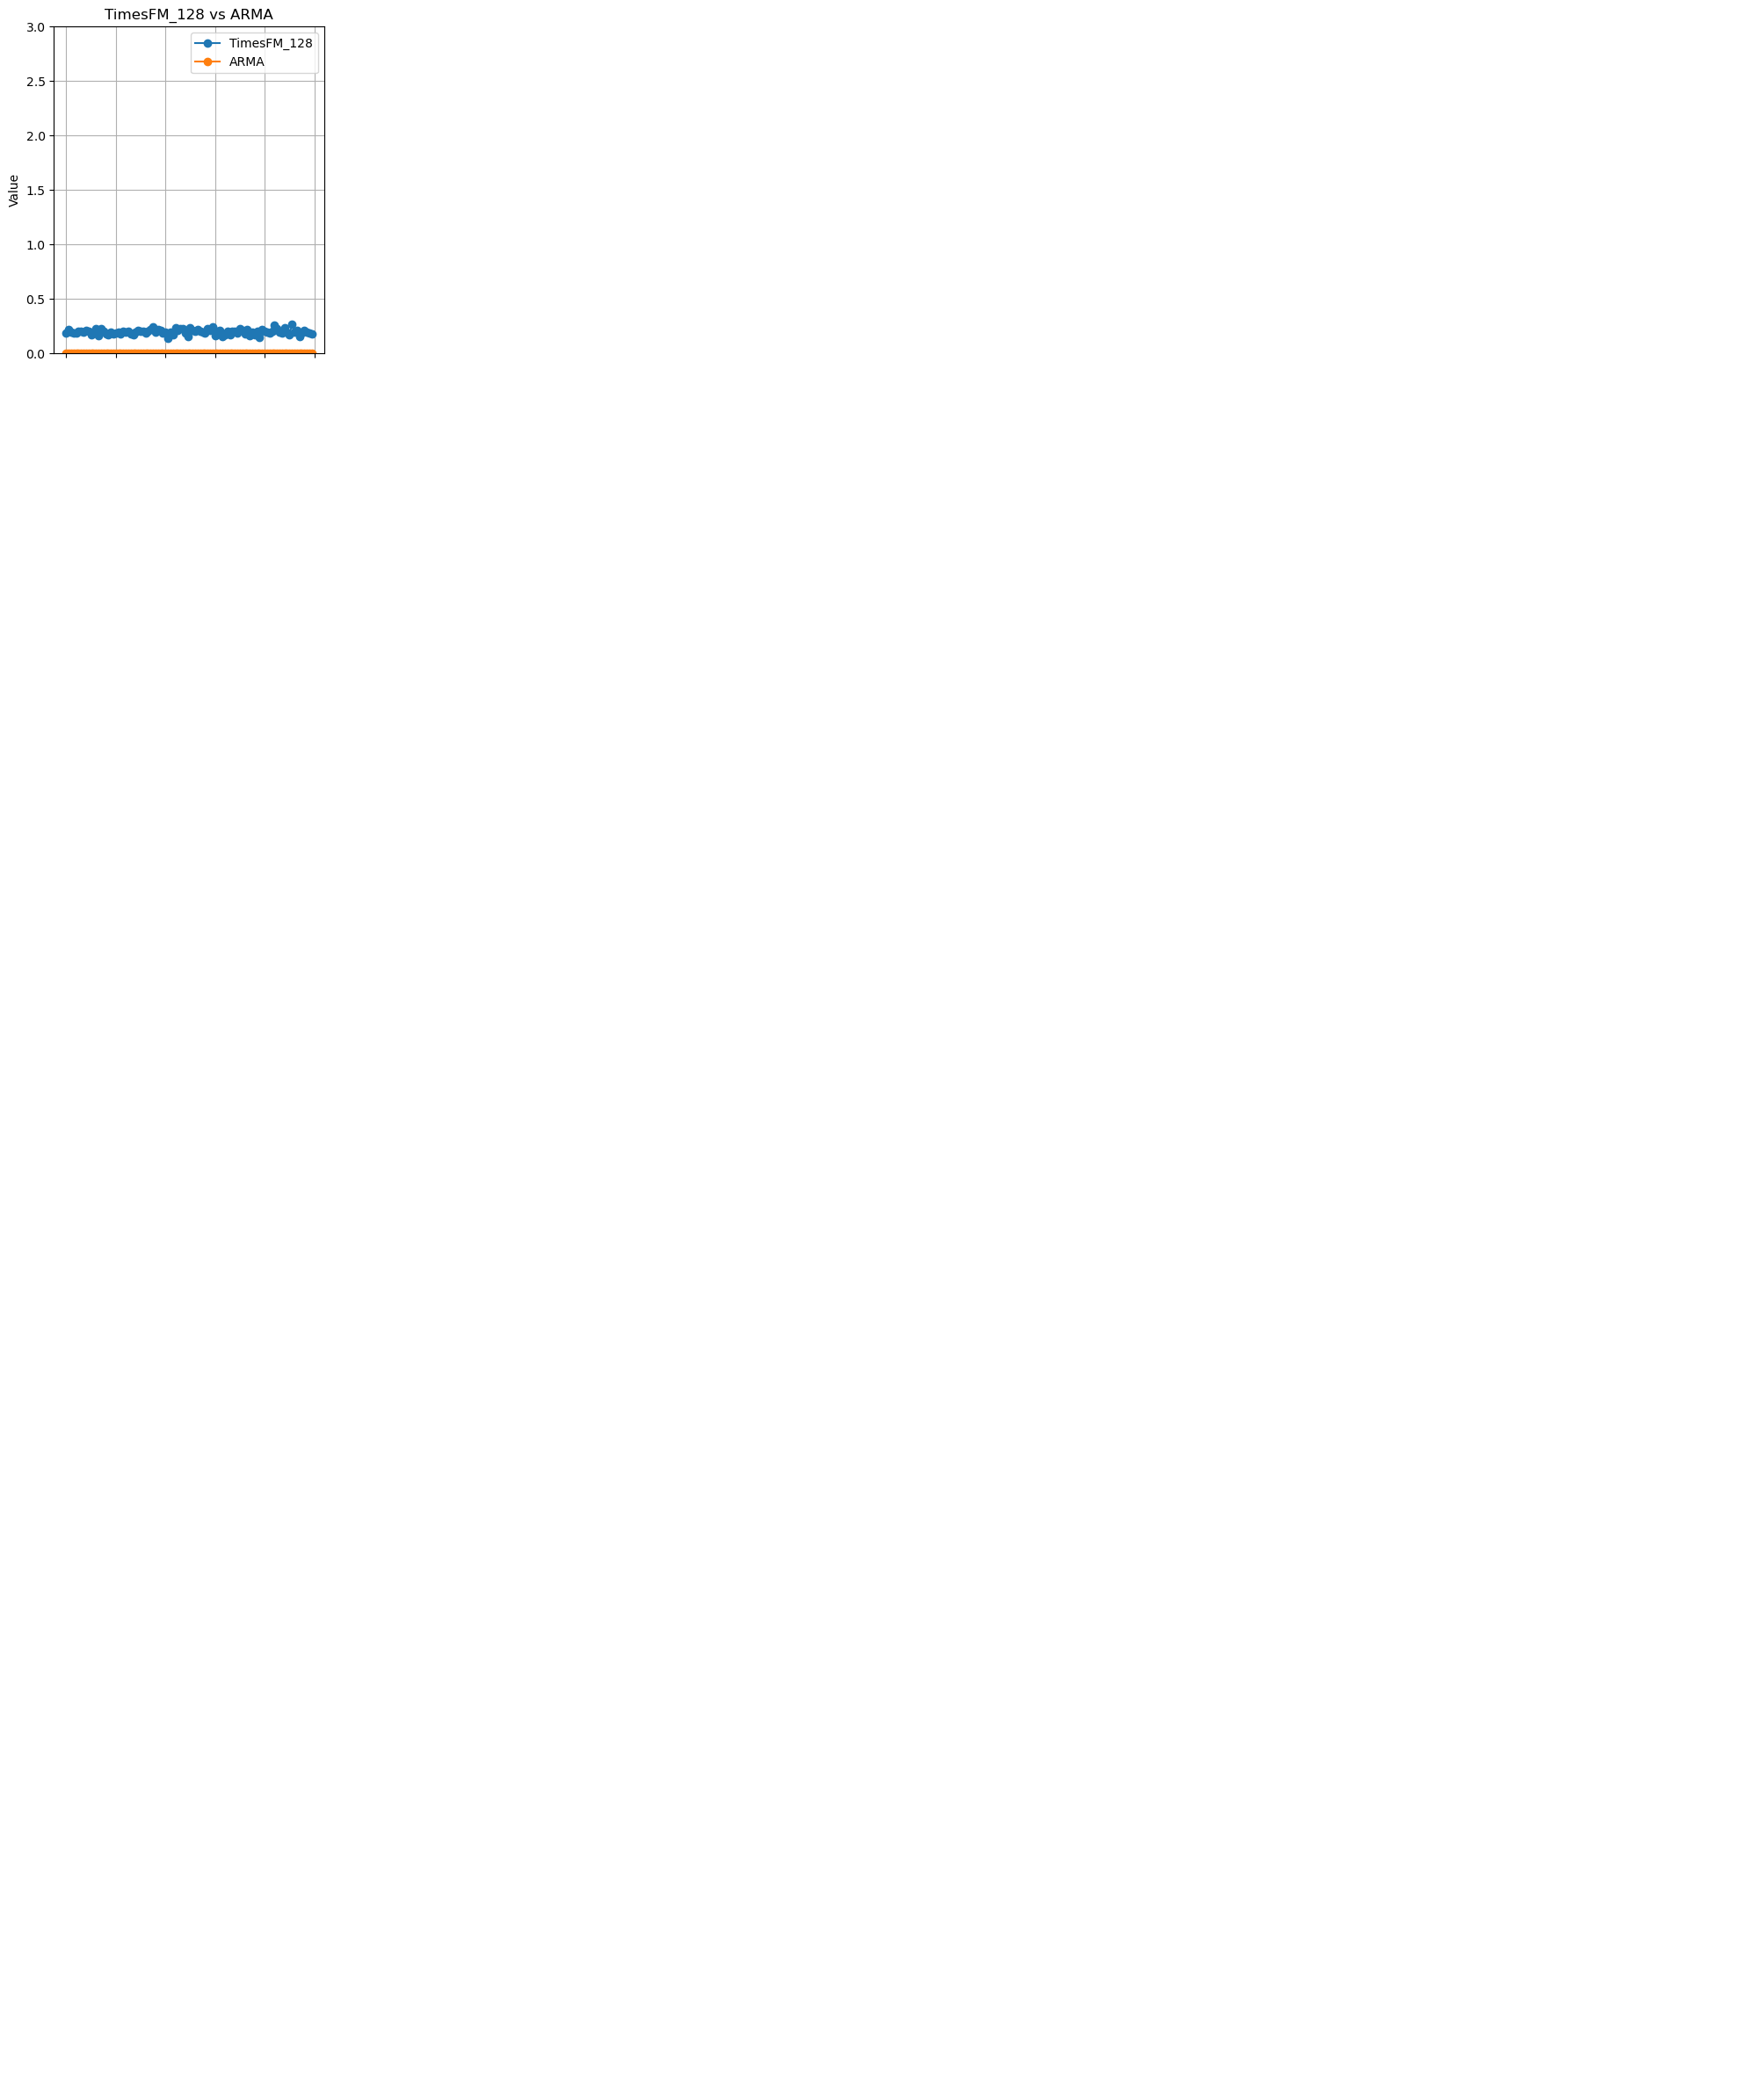

In [10]:
fig, axs = plt.subplots(6, 6, figsize=(20, 24), sharex=True)
axs = axs.flatten()
for idx, model in enumerate(model_mse_true.keys()):
    axs[idx].plot(model_mse_true[model], label=model, marker='o')
    axs[idx].plot(arma_mse_true, label='ARMA', marker='o')
    axs[idx].set_title(f'{model} vs ARMA')
    axs[idx].set_ylabel('Value')
    axs[idx].set_ylim(0, 3)
    axs[idx].grid(True)
    axs[idx].legend()
for ax in axs[len(model_mse_true):]:
    ax.axis('off')
axs[-1].set_xlabel('Step')
plt.tight_layout()
plt.show()


In [11]:
# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(model_mse_true['TimesFM_672'], label='TimesFM_768', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse_true,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point

# plt.plot(ar_mse_true,label = 'AR', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of true MSE')
plt.xlabel('Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.savefig(f'MSE_Plot/{number}.png')
plt.show()

KeyError: 'TimesFM_672'

<Figure size 1000x500 with 0 Axes>